In [ ]:
# Visualizations using matplotlib and seaborn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
#Group data by ad_date and filter out 2021 year.
df = pd.read_csv(r'D:\_EDUCATION\_DataAnalysis\homework\facebook_ads_data (2.0).csv')
df = pd.DataFrame(df)
df['ad_date'] = pd.to_datetime(df['ad_date'], format='mixed')

# Filter only for 2021
df = df[df['ad_date'].dt.year == 2021]

# Group by 'ad_date' and sum the necessary columns
df_grouped = df.groupby('ad_date').agg({
    'total_spend': 'sum',
    'total_impressions': 'sum',
    'total_clicks': 'sum',
    'total_value': 'sum'
}).reset_index()

# Recalculate new metrics
df_grouped['CPC'] = df_grouped['total_spend'] / df_grouped['total_clicks']
df_grouped['CPM'] = (1000 * df_grouped['total_spend']) / df_grouped['total_impressions']
df_grouped['CTR'] = df_grouped['total_clicks'] / df_grouped['total_impressions']
df_grouped['ROMI'] = df_grouped['total_value'] / df_grouped['total_spend']

# Handle division by zero (replace infinities and NaNs with 0)
df_grouped.replace([float('inf'), float('-inf')], 0, inplace=True)
df_grouped.fillna(0, inplace=True)

# Display result
print(df_grouped.head())

     ad_date  total_spend  total_impressions  total_clicks  total_value  \
0 2021-01-01         0.39                353             0         0.59   
1 2021-01-02         7.74              10709           205         6.90   
2 2021-01-04        70.06              22440          1256        68.47   
3 2021-01-05        81.15              60232          1379        61.68   
4 2021-01-06       142.77              65265           431       145.97   

        CPC       CPM       CTR      ROMI  
0  0.000000  1.104816  0.000000  1.512821  
1  0.037756  0.722757  0.019143  0.891473  
2  0.055780  3.122103  0.055971  0.977305  
3  0.058847  1.347290  0.022895  0.760074  
4  0.331253  2.187543  0.006604  1.022414  


Text(0, 0.5, 'Amount Spend Daily')

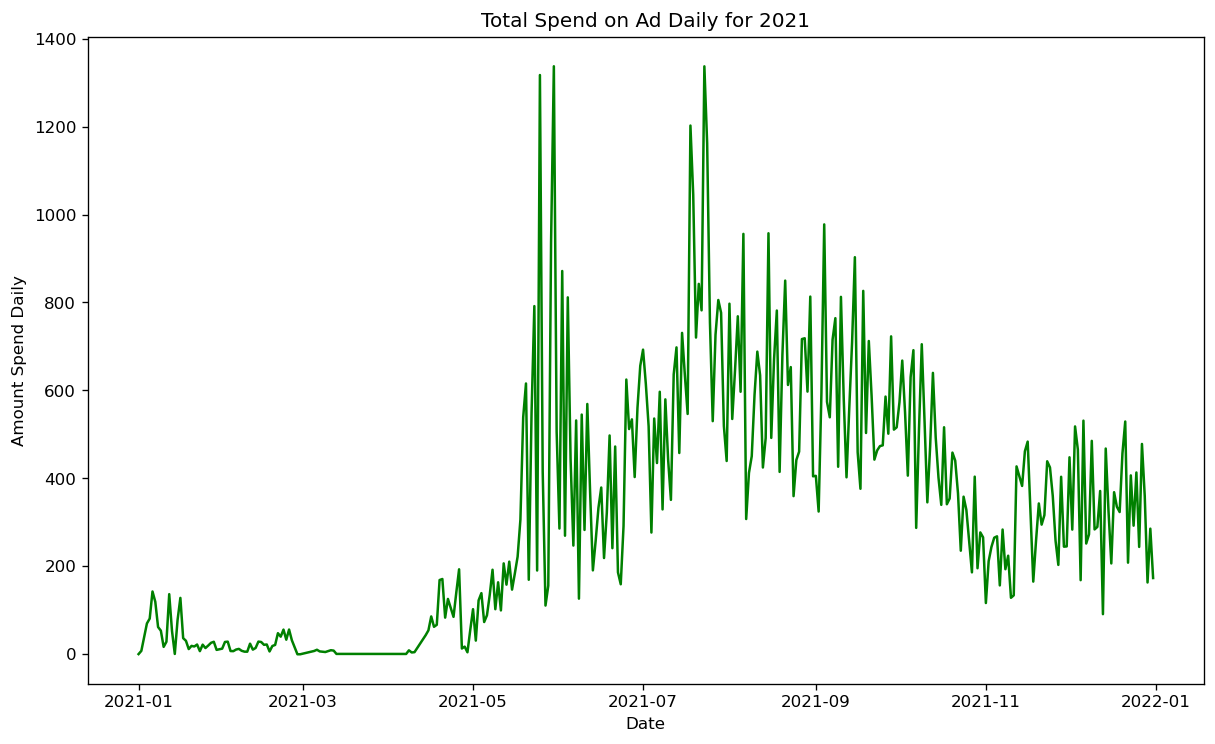

In [13]:
#Create a line chart using matplotlib 
x = df_grouped['ad_date']
y = df_grouped['total_spend']

plt.figure(figsize=(12,7), dpi=120)
plt.plot(x, y, color = 'green')
plt.title('Total Spend on Ad Daily for 2021')
plt.xlabel('Date')
plt.ylabel('Amount Spend Daily')

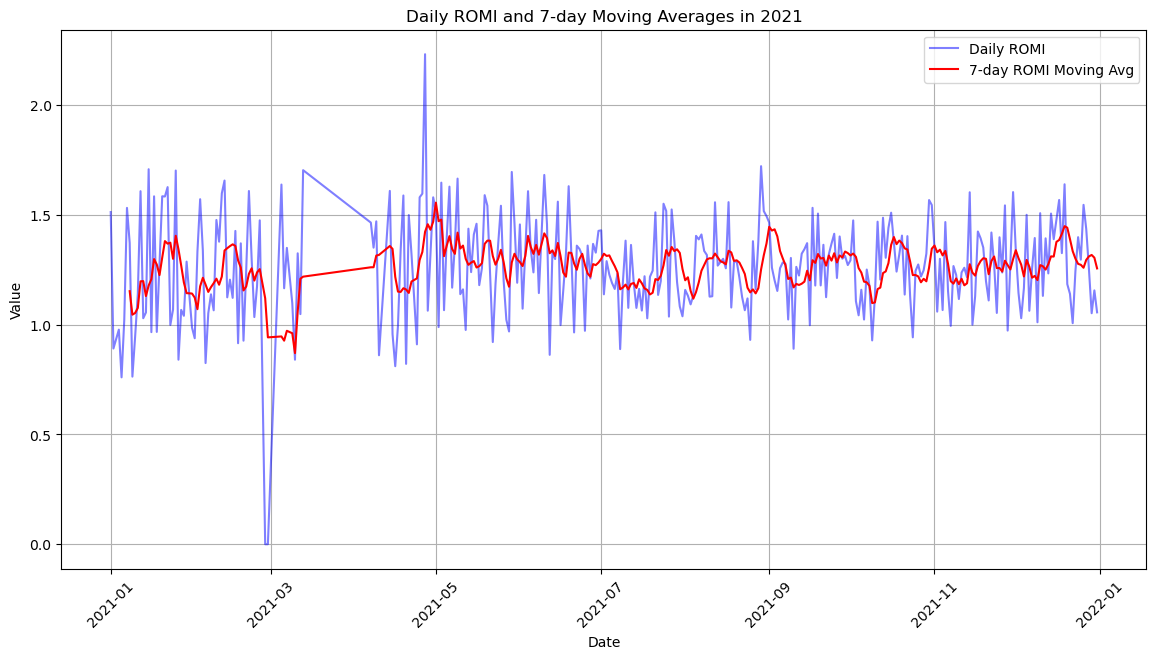

,ad_date,total_spend,total_impressions,total_clicks,total_value,CPC,CPM,CTR,ROMI,ROMI_MA,TotalSpend_MA
24,2021-01-26,19.87,14911,101,16.7,0.196733,1.332573,0.006774,0.840463,1.34361,17.401429


In [15]:
# Compute rolling averages (7-day moving average)
df_grouped['ROMI_MA'] = df_grouped['ROMI'].rolling(window=7).mean()
df_grouped['TotalSpend_MA'] = df_grouped['total_spend'].rolling(window=7).mean()

# Plot daily ROMI and moving averages
plt.figure(figsize=(14, 7))
sns.lineplot(x=df_grouped['ad_date'], y=df_grouped['ROMI'], label='Daily ROMI', color='blue', alpha=0.5)
sns.lineplot(x=df_grouped['ad_date'], y=df_grouped['ROMI_MA'], label='7-day ROMI Moving Avg', color='red')

# Formatting
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Daily ROMI and 7-day Moving Averages in 2021')
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# Show the plot
plt.show()
df_grouped.sample()